## Testing Julia for GAIA

using the julia language for GAIA analaysis <br>

1. Testing the optimization of the dbscan
2. Testng Affinity propagation


In [33]:
using PyCall
using DataFrames
using Statistics

using Clustering 
using Statistics
using Distances

push!(LOAD_PATH,"/home/stephane/Science/cluster/GAIA/master/src")
using gaiaClustering

import PyPlot; const plt = PyPlot

@pyimport astropy.io.votable as votable
# @pyimport matplotlib.pyplot as plt

## directory
rootdir = "/home/stephane/Science/cluster/GAIA"
wdir    = "/home/stephane/Science/cluster/GAIA/products"

cd(wdir)

In [34]:
## Main program

voname = "test.vot"

data       = read_votable(voname)
df         = filter_data(data)
dfcart     = add_cartesian(df)
blck       = [[1,2,3],[4,5], [6,7,8]]
wghtblck   = [5.0,6.0,1.0]
norm       = "identity"

dfcartnorm , scale8 = normalization_PerBlock(dfcart, blck, wghtblck , norm, false) 

## Votable test.vot read
## Filtering done ...
## Stars selected: 12531
## Cartesian transformation done ...
## Normalization identity done...
### [1pc,1pc,1pc,1km/s,1km/s,1mag,1mag] equivalent to [0.408248, 0.408248, 0.408248, 0.489898, 0.489898, 0.0816497, 0.0816497, 0.0816497]


(gaiaClustering.Df(12531, [361.018 149.106 … 319.377 309.238; -11.2355 -4.58225 … 1.63107 1.36784; … ; 0.0596989 0.0897788 … 0.0683989 0.110758; 0.0512564 0.0977288 … 0.0507048 0.0381331], [277.32 277.342 … 279.395 279.356; -33.2627 -33.2783 … -34.812 -34.8646; … ; 15.3938 16.2834 … 15.68 17.1638; 16.7528 18.5798 … 17.1387 18.9873], [0.0347643 0.0777114 … 0.0538083 0.208771; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]), [0.408248, 0.408248, 0.408248, 0.489898, 0.489898, 0.0816497, 0.0816497, 0.0816497])

In [42]:
## Clustering ..
println("## Starting Clustering ...")


###########################3
eps = 4.5

println("ϵ : $eps")

dftemp = copy1(dfcartnorm)

println("## dbscan..")
res1 = dbscan(dftemp.data , eps , leafsize=20, min_neighbors=10, min_cluster_size=25)
println("### done ...")

println("## Ward")
d = pairwise(Euclidean(), dftemp.data, dftemp.data)
res = hclust(d)
println("### done ...")

# println(res.order)
# println(res.heights)

ind = findall( x -> x < 1.0, res.heights)

indx = res.order[ind]
println(length(indx))

i = 1
for cl in res1
    println("i : $i")
    i += 1
    indx1 = cl.core_indices
    append!(indx1, cl.boundary_indices) 
    println(length(indx1))
    mean1 = mean(dfcart.data[1,indx1])
    lgal1 = mean(df.data[1,indx1])
    bgal1 = mean(df.data[2,indx1])
    println("Mean: $mean1")
    println("lgal : $lgal1")
    println("bgal : $bgal1")
end
indx = res1[1].core_indices
append!(indx, res1[1].boundary_indices)   

sdb = length(res1)
println("Number of dbscan cluster $sdb")

# indx = find1(res , 8)



## Starting Clustering ...
ϵ : 4.5
## dbscan..
### done ...
## Ward
### done ...
55
i : 1
133
Mean: 159.29702576967918
lgal : 279.6094935995155
bgal : -33.52853401810267
i : 2
184
Mean: 422.072745124769
lgal : 278.9039591715722
bgal : -33.5424240553449
i : 3
48
Mean: 241.8416670060994
lgal : 279.6029601421788
bgal : -33.551126808259234
i : 4
109
Mean: 253.30776439262056
lgal : 279.7373169457458
bgal : -33.446577333508166
i : 5
102
Mean: 318.5637393636839
lgal : 279.4272651375787
bgal : -33.32427193119523
i : 6
46
Mean: 461.43251090615314
lgal : 280.05251939690896
bgal : -33.20045180270068
i : 7
35
Mean: 269.1381580239531
lgal : 279.5850125806591
bgal : -33.2525658227004
i : 8
28
Mean: 360.0797316226216
lgal : 280.04325147867644
bgal : -33.365606478035346
Number of dbscan cluster 8


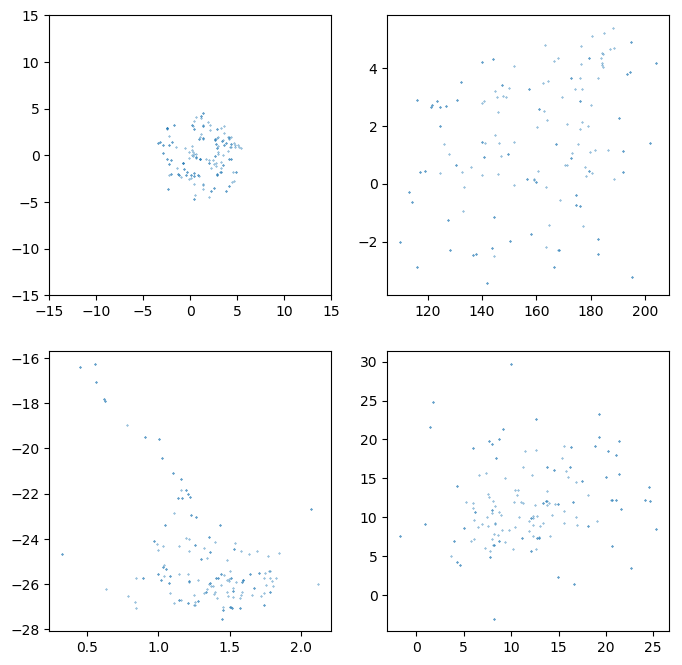

In [43]:
plt.figure(figsize=(8.0,8.0))

plt.subplot(2, 2, 1 , xlim = [-15,15], ylim = [-15,15])
x = dfcart.data[2,indx]
y = dfcart.data[3,indx]
plt.scatter(x, y , s = 0.1 )

plt.subplot(2, 2, 2)
x = dfcart.data[1,indx]
y = dfcart.data[2,indx]
plt.scatter(x, y , s = 0.1 )

plt.subplot(2, 2, 3)
x = dfcart.data[7,indx]
y = -dfcart.data[6,indx]
plt.scatter(x, y , s = 0.1 )

plt.subplot(2, 2, 4)
x = dfcart.data[4,indx]
y = -dfcart.data[5,indx]
plt.scatter(x, y , s = 0.1 )


plt.show()